In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.style.use('seaborn-whitegrid')

/var/folders/yx/_8fch6cj6w5cfvy2xlfjrsyw0000gn/T/ipykernel_10264/2657645821.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [109]:
# generate normal draw
np.random.seed(0)
n = 100
x = np.random.normal(size=n)
x_sq = x**2 + 0.5*np.random.normal(size=n) + 10
x2 = np.append(np.random.normal(size=int(3*n/4)), np.random.normal(3, 0.1, size = int(n/4)))
x2_sq = x2**2 + 0.5*np.random.normal(size=n)+ 10

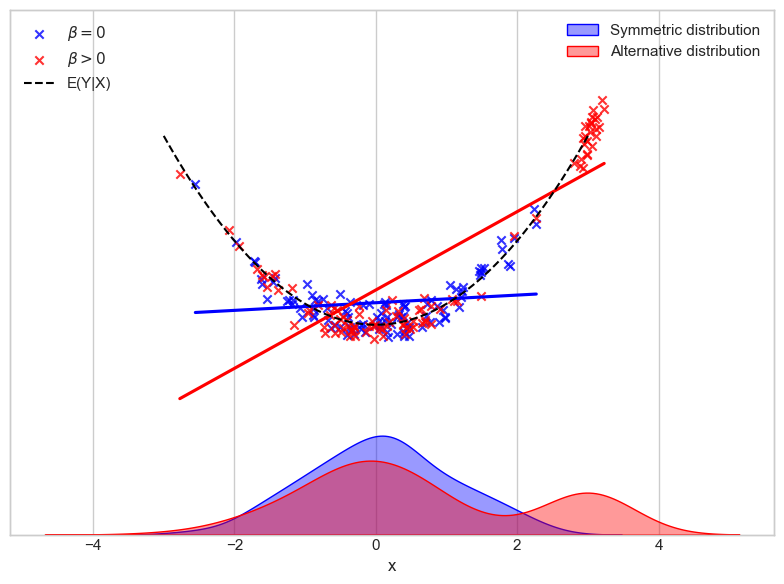

In [116]:
# create data frame
df = pd.DataFrame({
    "x": x,
    "x_sq": x_sq,
    "x2": x2,
    "x2_sq": x2_sq
})

# plot 
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.regplot(x="x", y="x_sq", data=df, fit_reg=True, ci=None, scatter=True, color="blue", ax=ax, marker = "x", label = r"$\beta = 0$")
# add density of x
# get twinx ax
ax2 = ax.twinx()
# hide right y-axis
ax2.yaxis.set_visible(False)
ax2.set_ylim(0, 2)
sns.kdeplot(x, color="blue", ax=ax2, fill=True, alpha = 0.4, label = "Symmetric distribution")

sns.regplot(x="x2", y="x2_sq", data=df, fit_reg=True, ci=None, scatter=True, color="red", ax=ax, marker = "x", label = r"$\beta > 0$")
# the same for x2 on the same plot
# add density of x2
sns.kdeplot(x2, color="red", ax=ax2, fill=True, alpha = 0.4, label="Alternative distribution")

# add line for quadratic process
x_lin = np.linspace(-3, 3, 100)
y_lin = x_lin**2 + 10
ax.plot(x_lin, y_lin, color="black", linestyle="--", label = "E(Y|X)")
ax.set_ylim(0,25)
ax.set_ylabel("y")
ax.set_xlabel("x")
# hide yticks
ax.yaxis.set_visible(False)
ax.legend(loc = "upper left")
plt.legend()
plt.tight_layout()

# save plot
plt.savefig("regression_misspecified.pdf", format="pdf", dpi = 400)

plt.show()

### Adding interaction

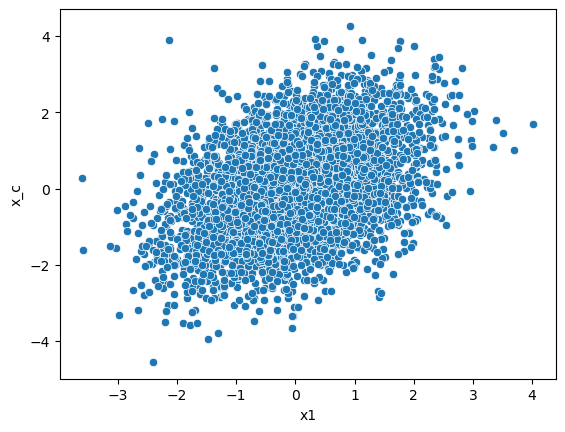

In [59]:
# draw 2 RVs from joint correlated normal
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)
x_c = 0.5*x1 + 0.5*x2 + np.random.normal(size=n)
df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "x_c": x_c,
    "int": x1*x2
})

sns.scatterplot(x="x1", y="x_c", data=df)
plt.show()

In [73]:
y = 2 + x1 + x_c + np.random.normal(size=n)
y_int = 2 + x1 + x_c + x1*x_c + np.random.normal(size=n)
df["y"] = y
df["y_int"] = y_int

In [74]:
# run linear regression on x and x2
import statsmodels.api as sm
X = sm.add_constant(df[["x1", "x_c"]])

model = sm.OLS(y_int, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     3309.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        23:11:25   Log-Likelihood:                -9656.8
No. Observations:                5000   AIC:                         1.932e+04
Df Residuals:                    4997   BIC:                         1.934e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4830      0.024    105.089      0.0

In [53]:
# now run regression with interaction
X_int = sm.add_constant(df[["x1", "x2", "int"]])

model = sm.OLS(y_int, X_int).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     8567.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        21:56:44   Log-Likelihood:                -7047.9
No. Observations:                5000   AIC:                         1.410e+04
Df Residuals:                    4996   BIC:                         1.413e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9978      0.015    133.370      0.0